In [1]:
#Manipulação e visualização de de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools

#Construção e avaliação de modelos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.base import clone


#Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

#Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline


## Features

## Dataset

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Estatísticas Descritivas

In [5]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot: >

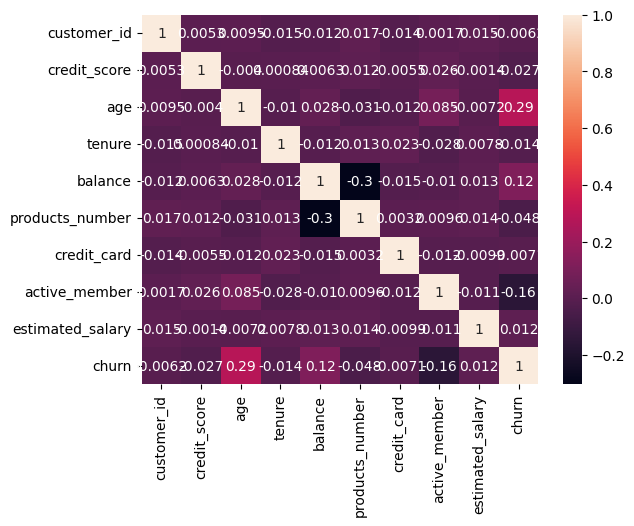

In [6]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [7]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

## EDA

In [8]:
df.drop('customer_id', 1,  inplace = True)

df.head()

C:\Users\joaoi\AppData\Local\Temp\ipykernel_8236\1785894409.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('customer_id', 1,  inplace = True)


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
cat_vars = ['country', 'gender']
num_vars = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
dist_vars = ['products_number', 'credit_card', 'active_member']

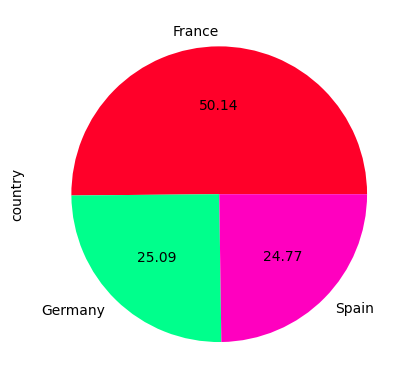

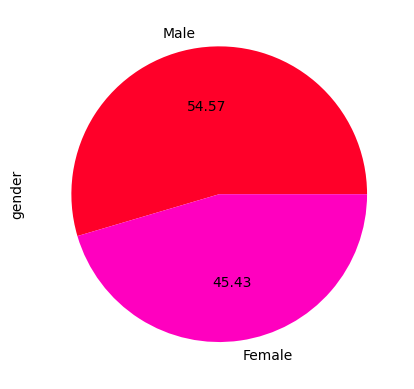

In [10]:
for k in cat_vars:
    df[k].value_counts().plot(kind='pie', autopct = "%.2f", cmap = 'gist_rainbow')
    plt.show()

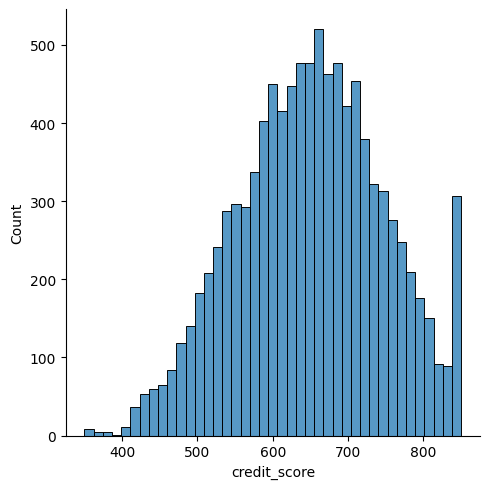

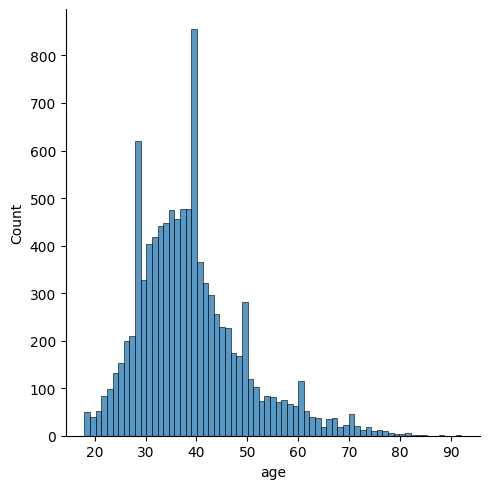

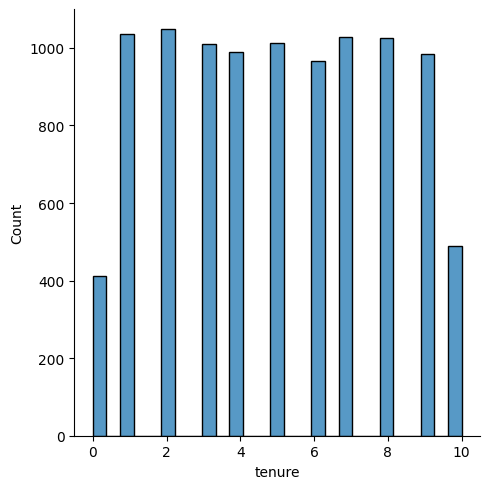

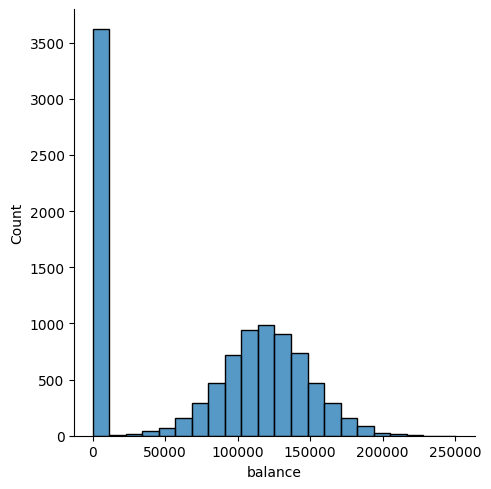

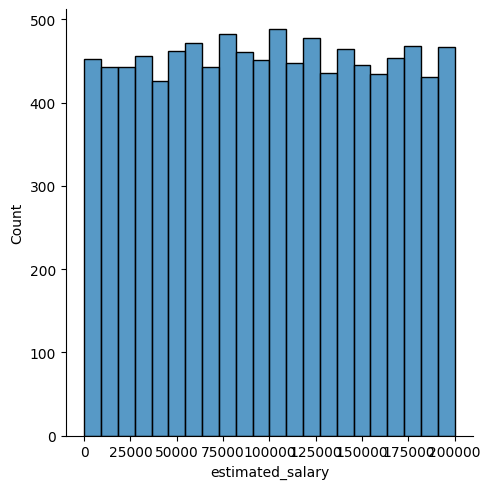

In [11]:
for i in num_vars:
    sns.displot(df[i])
    plt.show()

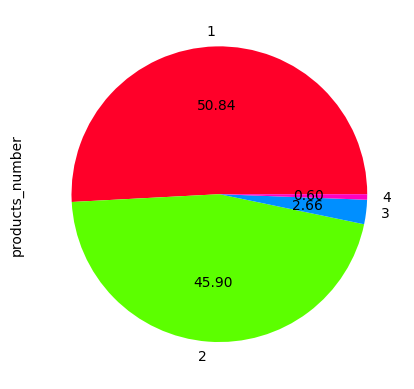

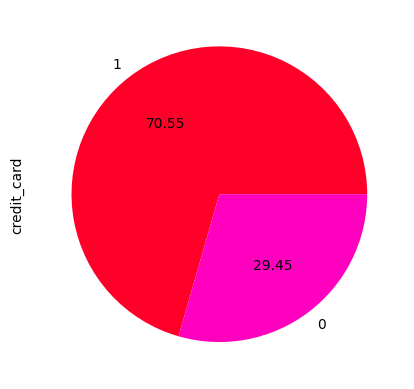

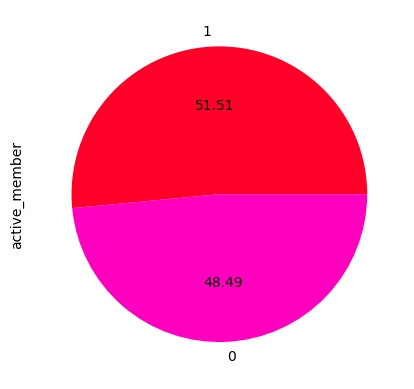

In [12]:
for j in dist_vars:
    df[j].value_counts().plot(kind='pie', autopct = "%.2f", cmap = 'gist_rainbow')
    plt.show()

## Pré-Processamento

### Features:

In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = np.random.randint(0, 1000))

In [15]:
y_test_df = pd.DataFrame(y_test)
y_train_df = pd.DataFrame(y_train)

print('y_train',y_train_df.value_counts())
print('y_test',y_test_df.value_counts())


y_train 0    6359
1    1641
dtype: int64
y_test 0    1604
1     396
dtype: int64


### Feature Scaling e OneHotEncoding

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [17]:
df.shape

(10000, 11)

In [18]:
cat_cols_idx = [1, 2] #country e gender
num_cols_idx = [0, 3, 4, 5, 9] #credit_score, age,tenure,  balance, estimated_salary
dist_cols_idx = [] #products_number, credit_card, active_member

#Pipeline para colunas categóricas
cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

#Pipeline para colunas numéricas 
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

#Aplicando as pipelines
ct = ColumnTransformer([
    ('categorical', cat_pipeline, cat_cols_idx),
    ('numerical', num_pipeline, num_cols_idx)
], remainder = 'passthrough')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [19]:
from imblearn.over_sampling import SMOTE

# Criar objeto SMOTE
sm = SMOTE(random_state=np.random.randint(0, 1000))

# Aplicar oversampling no conjunto de dados
X_train, y_train = sm.fit_resample(X_train, y_train)


In [20]:
y_test_df = pd.DataFrame(y_test)
y_train_df = pd.DataFrame(y_train)
x_train_df = pd.DataFrame(X_train)

print('y_train',y_train_df.value_counts())
print('y_test',y_test_df.value_counts())

y_train 0    6359
1    6359
dtype: int64
y_test 0    1604
1     396
dtype: int64


In [21]:
X_train[1]

array([1.        , 0.        , 0.        , 0.        , 1.        ,
       0.634     , 0.06756757, 0.1       , 0.        , 0.45785177,
       2.        , 1.        , 0.        ])

## Construindo modelos

## Decision Tree Classifier

### Grid Search

In [22]:
dec_tree = DecisionTreeClassifier()

param_grid = [{'max_depth': [2, 3, 4, 5, 10], 'class_weight':['balanced', None]
               , 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}]

grid_search = GridSearchCV(dec_tree, param_grid, cv = 5, scoring = 'recall')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'class_weight': ['balanced', None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4, 5, 10],
                          'splitter': ['best', 'random']}],
             scoring='recall')

In [23]:
print("Parâmetros recomendados:", grid_search.best_params_)
print("Recall médio do melhor conjunto de parâmetros encontrado:", grid_search.best_score_)

Parâmetros recomendados: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
Recall médio do melhor conjunto de parâmetros encontrado: 0.8112961368505955


In [24]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.8663661662148224 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
0.8583348784792864 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}
0.8617251469920836 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
0.8548575830888312 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
0.8977470301089415 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
0.8422535459306866 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
0.8710737073173607 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
0.8593517295314627 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
0.8891247968445819 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
0.9007197881975257 {'class_weight': 'balanced'

In [25]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = np.random.randint(0, 1000)
                             , class_weight = 'balanced', splitter = 'best')

dtc.fit(X_train, y_train)

y_pred2 = dtc.predict(X_test)

In [26]:
# Métricas de avaliação do modelo
acuracia = accuracy_score(y_test, y_pred2)
auc_area = roc_auc_score(y_test, y_pred2)
cm = confusion_matrix(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print('Acurácia:', round(acuracia, 2))
print('AUC:', round(auc_area, 2))
print('Confusion Matrix:', cm)
print('Recall:', round(recall, 2))
print('Precision:', round(precision, 2))
print('Especificidade:', round(specificity, 2))

Acurácia: 0.68
AUC: 0.7
Confusion Matrix: [[1071  533]
 [ 106  290]]
Recall: 0.73
Precision: 0.35
Especificidade: 0.67


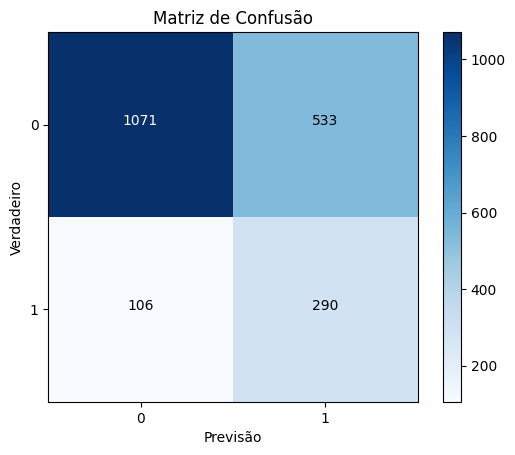

In [27]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()

classes = ['0', '1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')

plt.show()

In [28]:
# Criar 
skfolds = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)
clone_clf = clone(dtc)

# Definir a métrica de recall
scoring = make_scorer(recall_score)

# Calcular os valores de recall para cada fold
rec_scores = cross_val_score(clone_clf, X_train, y_train, cv=skfolds, scoring=scoring)

# Calcular a média e o desvio padrão dos valores de recall
rec_mean = rec_scores.mean()
rec_std = rec_scores.std()

# Retornar o resultado formatado
result = "Recall: {:.2f} (+/- {:.2f})\nrec_scores: {}".format(rec_mean, rec_std, rec_scores)
print(result)

Recall: 0.75 (+/- 0.02)
rec_scores: [0.73522013 0.77421384 0.7753304  0.73522013]


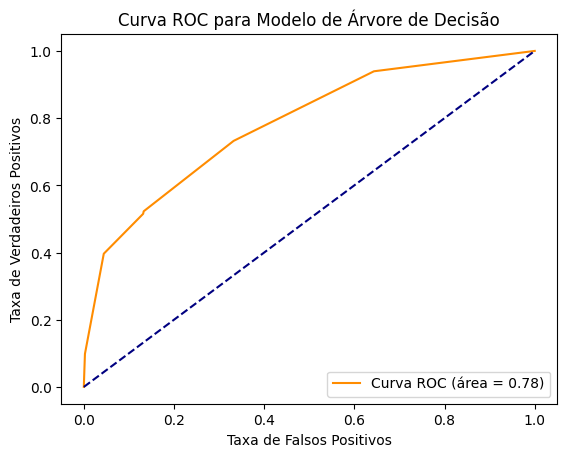

In [29]:
# Obter as probabilidades previstas para a classe positiva
y_proba = dtc.predict_proba(X_test)[:, 1]

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Modelo de Árvore de Decisão')
plt.legend(loc="lower right")
plt.show()

## Random Forest Classifier

### Grid Search

In [30]:
forest_reg = RandomForestClassifier()

param_grid = [{'n_estimators' : [90, 100, 115, 130], 'max_depth': [2, 3, 4, 10]
               ,'criterion':['gini', 'entropy']}]

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'recall')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4, 10],
                          'n_estimators': [90, 100, 115, 130]}],
             scoring='recall')

In [31]:
print("Parâmetros recomendados:", grid_search.best_params_)
print("Recall médio do melhor conjunto de parâmetros encontrado:", grid_search.best_score_)

Parâmetros recomendados: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 90}
Recall médio do melhor conjunto de parâmetros encontrado: 0.8430618440390125


In [32]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.8698992103543666 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 90}
0.8830878511358629 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100}
0.8754872998296195 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 115}
0.8761151608884968 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 130}
0.883801088994877 {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 90}
0.8817512637553202 {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}
0.8788935342766061 {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 115}
0.8796086964171633 {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 130}
0.8885033444356577 {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 90}
0.8871730334445319 {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}
0.8873516387754088 {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 115}
0.8891217358818658 {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 130}
0.9181839924759158 {'criterion': 'gini', 'max_depth': 10, 'n_estimat

In [33]:
rfc = RandomForestClassifier(max_depth = 3, n_estimators = 100
                             , random_state = np.random.randint(0, 1000), class_weight = None, criterion = 'gini')

rfc.fit(X_train, y_train)

y_pred3 = rfc.predict(X_test)

In [34]:
# Métricas de avaliação do modelo
acuracia = accuracy_score(y_test, y_pred3)
auc_area = roc_auc_score(y_test, y_pred3)
cm = confusion_matrix(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print('Acurácia:', round(acuracia, 2))
print('AUC:', round(auc_area, 2))
print('Confusion Matrix:', cm)
print('Recall:', round(recall, 2))
print('Precision:', round(precision, 2))
print('Especificidade:', round(specificity, 2))

Acurácia: 0.75
AUC: 0.73
Confusion Matrix: [[1218  386]
 [ 115  281]]
Recall: 0.71
Precision: 0.42
Especificidade: 0.76


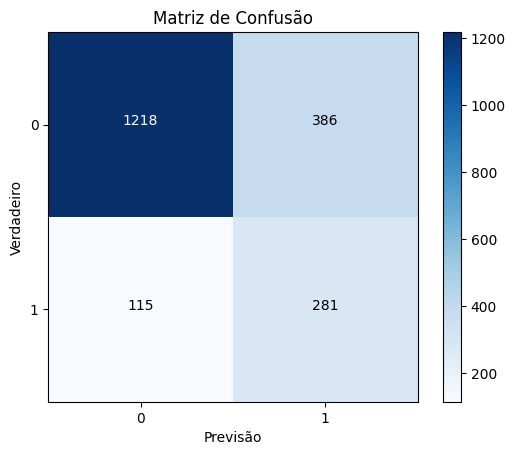

In [35]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()

classes = ['0', '1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')

plt.show()

In [36]:
skfolds = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)
clone_clf = clone(rfc)

# Definir a métrica de recall
scoring = make_scorer(recall_score)

# Calcular os valores de recall para cada fold
rec_scores = cross_val_score(clone_clf, X_train, y_train, cv=skfolds, scoring=scoring)

# Calcular a média e o desvio padrão dos valores de recall
rec_mean = rec_scores.mean()
rec_std = rec_scores.std()

# Retornar o resultado formatado
result = "Recall: {:.2f} (+/- {:.2f})\nrec_scores: {}".format(rec_mean, rec_std, rec_scores)
print(result)

Recall: 0.78 (+/- 0.01)
rec_scores: [0.7918239  0.78679245 0.77092511 0.76100629]


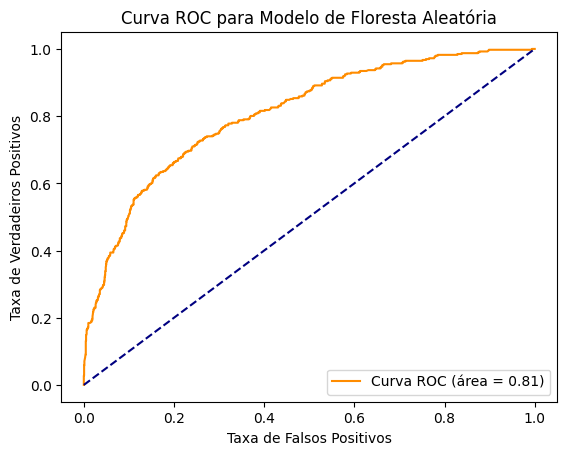

In [37]:
# Obter as probabilidades previstas para a classe positiva
y_proba = rfc.predict_proba(X_test)[:, 1]

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Modelo de Floresta Aleatória')
plt.legend(loc="lower right")
plt.show()